# Simple linear regression: minimal example

## Import libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generate random input data to train on

In [2]:
# Size of the training set
observations = 1000

# Generate arrays of random float
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

# Generate input as a matrix from xs and zs with dimentions: observations x 2 
inputs = np.column_stack((xs, zs))

# inputs is a grid with dimensions: 2 x observation
print(inputs.shape)

(1000, 2)


## Create the targets

In [3]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)

(1000, 1)


## Plot the training data

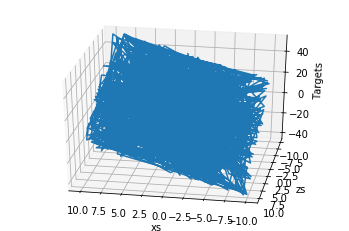

In [4]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

## Init variables

In [5]:
init_range = 0.1 

# Pick initial weigths and biases from the interval [-0.1, 0.1]

# As we have 2 variables (x,z) the size of the weigths will be 2x1
weigths = np.random.uniform(-init_range, init_range, size=(2,1))

# As we have 1 output (y) the size of the weigths will be 1x1, a scalar
biases = np.random.uniform(-init_range, init_range, size=1)

print(weigths)
print(biases)

[[-0.04117031]
 [-0.0789397 ]]
[-0.01286633]


## Set a learning rate

In [6]:
learning_rate = 0.02

# it will vary the weigths and biasis so the outputs are closest to the targets
# In other words: minimize the loss function with respect to the weigths and biasis
# This is a regration, so we will use 1/2 l2-norm function as loss function

## Train the model

In [7]:
# iterativelly search for the min of the loss fn using the optmization fn
for i in range (300):
    # calculate ouputs for given weigths and biases
    outputs = np.dot(inputs, weigths) + biases
    deltas = outputs - targets
    
    # calculate the loss fn that compare outputs to the targets
    loss = np.sum(deltas ** 2) / 2 / observations
    
    print(loss) # this must decrese!
    
    # Update weight and biases for next iteration using n-parameter gradient descent methodology
    deltas_scaled = deltas / observations
    weigths = weigths - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
   

214.31782996750252
38.12396621208942
15.101093966288358
11.748983032024759
10.936703261668582
10.465437808396597
10.052441696466902
9.660859835960219
9.285412011382803
8.924891441298795
8.578634966949652
8.246069282967577
7.92665191550592
7.619862885485206
7.325202905896433
7.042192446528807
6.770370937836201
6.509296019388586
6.258542819718505
6.017703264854975
5.786385414222561
5.564212822799512
5.35082392849377
5.145871463739364
4.949021890355654
4.7599548567496806
4.5783626765782595
4.403949828021419
4.236432472852294
4.075537994520824
3.921004554499517
3.7725806661692975
3.630024785551978
3.493104918223304
3.361598241766882
3.2352907431545774
3.113976870463222
2.997459198360892
2.885548106818314
2.778061472522606
2.674824372491067
2.575668799402785
2.4804333881847005
2.3889631534072526
2.301109237062191
2.2167286663121066
2.135684120817464
2.0578437092624493
1.983080754716002
1.9112735884786516
1.842305352079771
1.7760638071029158
1.7124411525298322
1.6513338493058471
1.5926424518

## Print weights and biases

In [8]:
print(weigths, biases)

[[ 2.00067384]
 [-2.99981598]] [4.98388541]


## Plot outputs vs targets

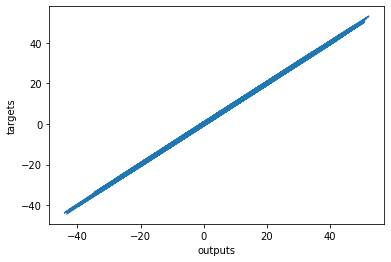

In [9]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()